In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

In [9]:
df_train=pd.read_csv('BigMart_Train.csv')
df_test=pd.read_csv('BigMart_Test.csv')

In [14]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)


In [16]:
df_test.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3


In [27]:
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df_train['Outlet_Size']=imp.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [28]:
df_test['Outlet_Size']=imp.fit_transform(df_test['Outlet_Size'].values.reshape(-1,1))

In [30]:
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
df_train['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df_test['Item_Weight']=imp.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))


In [34]:
df_train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [35]:
df_test.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [36]:
df_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [37]:
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

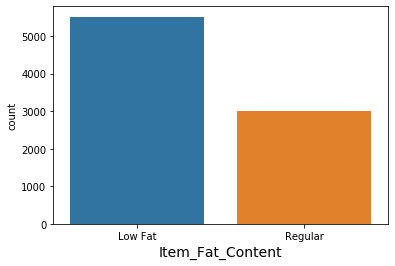

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df_train)
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

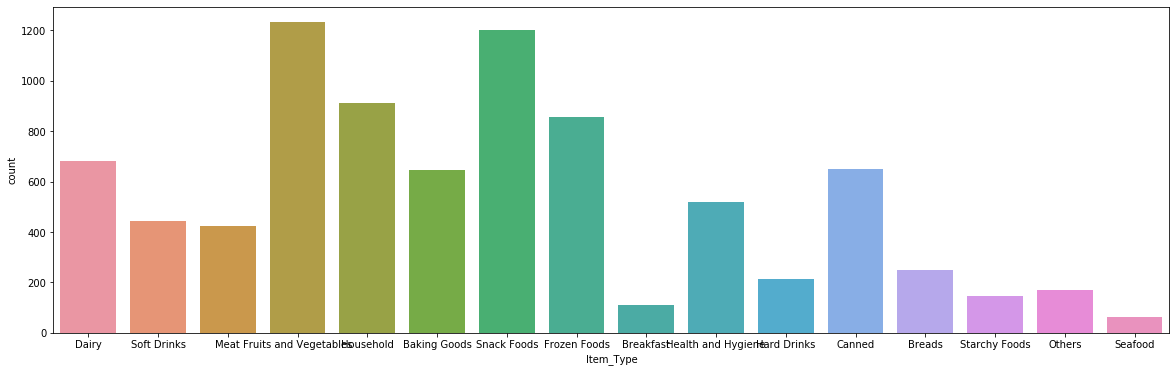

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(df["Item_Type"])

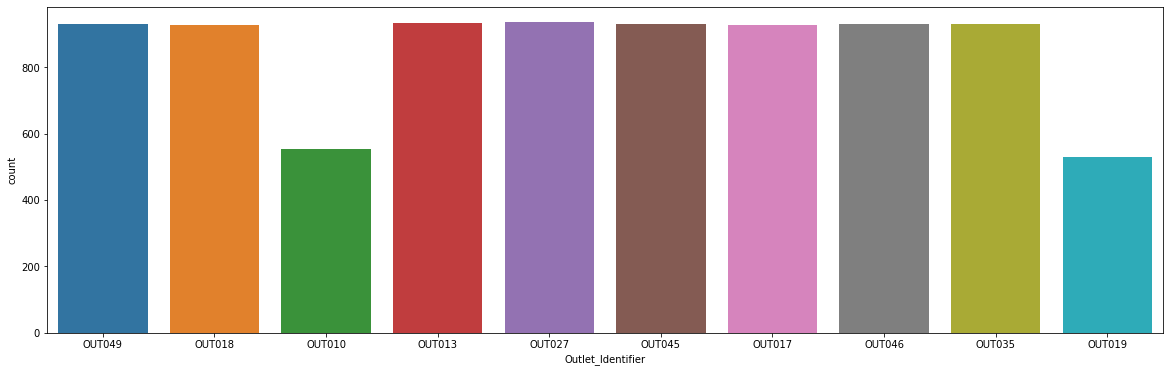

In [42]:
plt.figure(figsize=(20,6))
sns.countplot(df["Outlet_Identifier"])

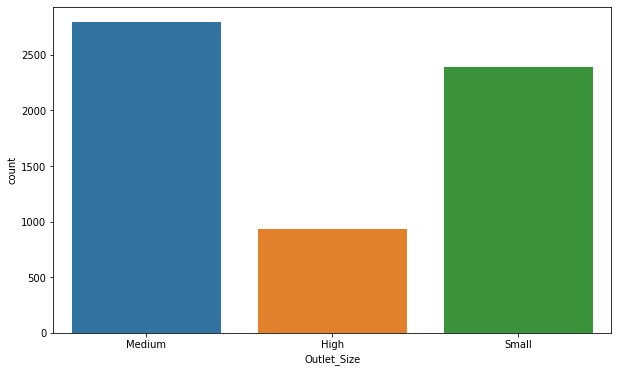

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df["Outlet_Size"])

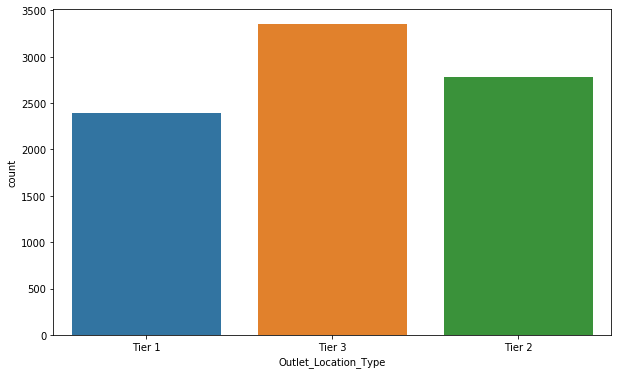

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(df["Outlet_Location_Type"])

Text(0, 0.5, 'Item_Outlet_Sales')

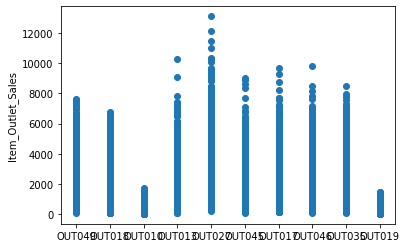

In [50]:
plt.scatter(df['Outlet_Identifier'],df['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

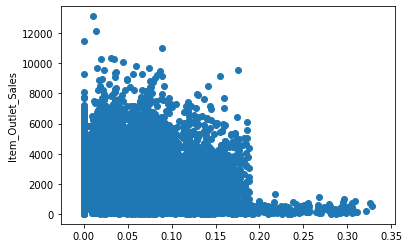

In [51]:
plt.scatter(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

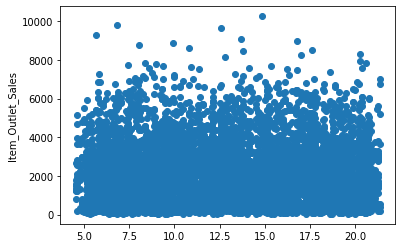

In [52]:
plt.scatter(x=df['Item_Weight'],y=df['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

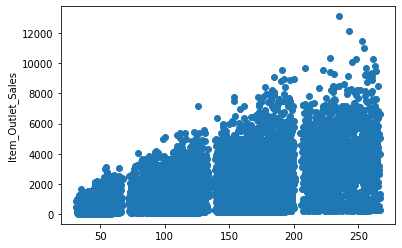

In [53]:
plt.scatter(x=df['Item_MRP'],y=df['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')

No handles with labels found to put in legend.


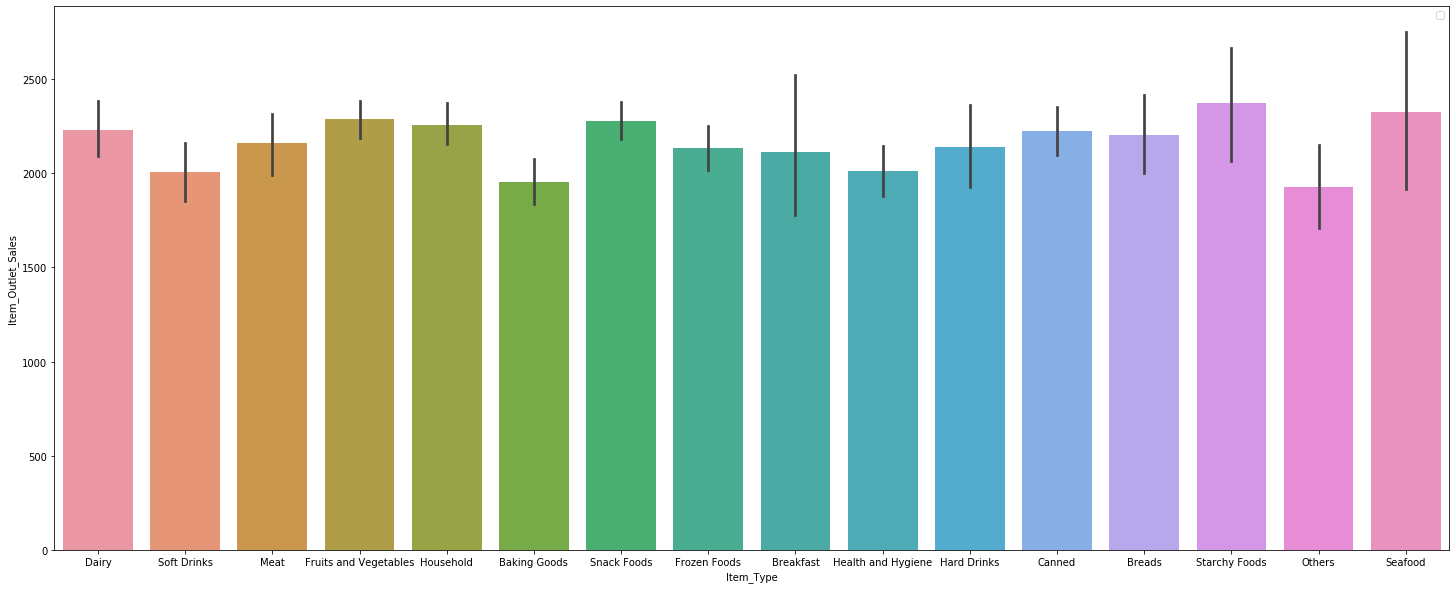

In [56]:
plt.figure(figsize=(25,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df_train)
plt.xlabel('Item_Type')
plt.legend()
plt.show()

No handles with labels found to put in legend.


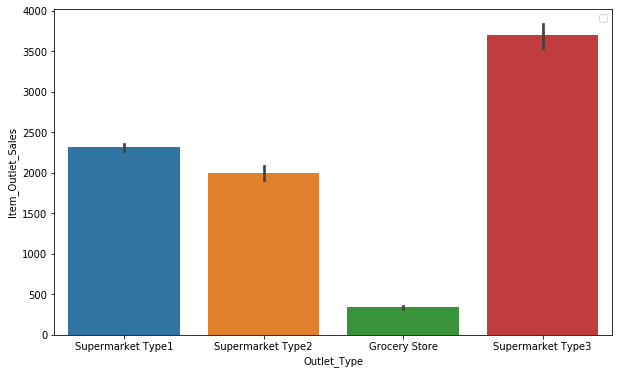

In [62]:
plt.figure(figsize=(10,6))
sns.barplot('Outlet_Type','Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Type')
plt.legend()
plt.show()

No handles with labels found to put in legend.


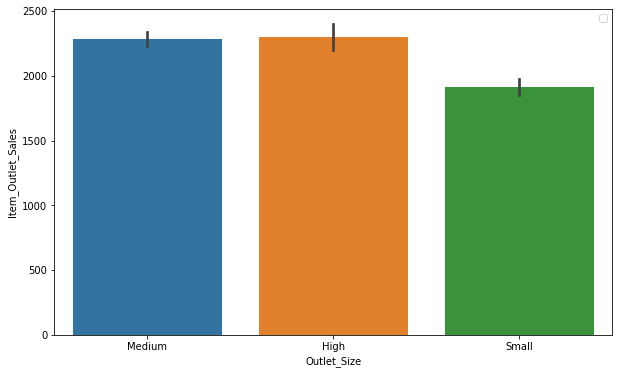

In [61]:
plt.figure(figsize=(10,6))
sns.barplot('Outlet_Size','Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Size')
plt.legend()
plt.show()

In [65]:
df_train_corr=df_train.corr()

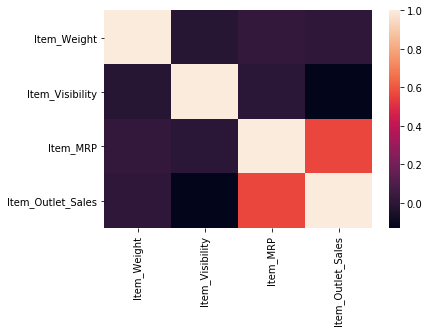

In [67]:
sns.heatmap(df_train_corr)

In [69]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])
    
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,0,2,Supermarket Type1,994.7052


In [70]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [72]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [84]:
oh=OneHotEncoder()

df_Item=pd.DataFrame(oh.fit_transform(df_train[['Item_Type']]).toarray(),dtype=int,columns=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'])

df_Item_test=pd.DataFrame(oh.fit_transform(df_test[['Item_Type']]).toarray(),dtype=int,columns=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'])

df_Outlet_test=pd.DataFrame(oh.fit_transform(df_test[['Outlet_Type']]).toarray(),dtype=int,columns=['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'])

df_Outlet=pd.DataFrame(oh.fit_transform(df_train[['Outlet_Type']]).toarray(),dtype=int,columns=['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'])








In [85]:
df_train=pd.concat([df_train,df_Item,df_Outlet],axis=1)

In [87]:
df_train.drop(['Item_Type','Outlet_Type'],axis=1,inplace=True)

In [88]:
df_test=pd.concat([df_test,df_Item_test,df_Outlet_test],axis=1)

In [89]:
df_test.drop(['Item_Type','Outlet_Type'],axis=1,inplace=True)

In [90]:
df_train.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Dairy,Soft Drinks,Meat,...,Hard Drinks,Canned,Breads,Starchy Foods,Others,Seafood,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
y = df_train['Item_Outlet_Sales']
x = df_train.drop('Item_Outlet_Sales', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 44)


In [92]:
x_train.shape

(5966, 26)

In [93]:
y_train.shape

(5966,)

In [94]:
x_test.shape

(2557, 26)

In [95]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
LR.coef_

array([-2.16466785e+00,  3.11718828e+01, -2.12157225e+02,  1.56124089e+01,
        2.83849225e+01,  3.58259560e-01, -2.34795486e+01, -4.56357583e+00,
       -1.29335736e-02,  1.30611893e+01, -2.12538258e+01, -3.33521277e+01,
       -7.83475408e+00,  3.25369655e+01, -2.89656839e+01, -5.46655083e+01,
       -3.56367782e+01,  7.17861117e+01,  5.43591375e+01,  7.36082591e+00,
       -8.23241834e+01,  1.12984690e+02, -1.74213161e+03,  2.30237837e+02,
       -7.45369469e+01,  1.58643072e+03])

In [97]:
LR.intercept_

-108.08252786521507

In [98]:
LR.score(x_train,y_train)

0.5554371415697106

In [99]:
pred=LR.predict(x_test)
print("Predicted by machine",pred)
print("Actual price",y_test)

Predicted by machine [1526.57776642 1030.24756768 1464.71412824 ... 3017.88031098 -592.63060828
 1393.54132767]
Actual price 6755    1318.2840
613      177.7686
8462    1494.0552
4496    1246.3776
8024    1772.3596
          ...    
594     2886.2430
6638     547.2876
3136    3858.9768
6811      75.9012
2075     749.0250
Name: Item_Outlet_Sales, Length: 2557, dtype: float64


In [100]:
print("Errors:")
print("Mean Squered",mean_squared_error(y_test,pred))
print("Mean absulate",mean_absolute_error(y_test,pred))
print("RMS",np.sqrt(mean_squared_error(y_test,pred)))
print('R2Score ',r2_score(y_test,pred))

Errors:
Mean Squered 1205634.3846337078
Mean absulate 814.0854231129866
RMS 1098.0138362669697
R2Score  0.5782383197170052


In [102]:
print('Testing data for prediction',LR.predict(df_test))

Testing data for prediction [1795.36803261 1497.9695153  1972.30289826 ... 1938.56639174 3512.77543855
 1398.15785981]


In [103]:
from sklearn.model_selection import cross_val_score
dtscore=cross_val_score(LR,x,y,cv=4)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [0.56605    0.52944036 0.57510505 0.55458718]
0.5562956484118201 0.017125030044876168


In [105]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001)

In [106]:
ls.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
ls.score(x_train,y_train)

0.5554371412279366

In [104]:
from sklearn.externals import joblib
joblib.dump(LR,'LR_BigMart.pkl')

['LR_BigMart.pkl']